In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("cell_samples.csv")#loading data into the dataframe
df.head()#first five rows
df.tail()#last five rows
df.columns#column names
df['Clump']#specific column
df[['Clump','UnifSize']]#multiple columns
len(df)#number of rows
df[0:12]#slicing
df.UnifShape#specific column

0       1
1       4
2       1
3       8
4       1
       ..
694     1
695     1
696    10
697     6
698     8
Name: UnifShape, Length: 699, dtype: int64

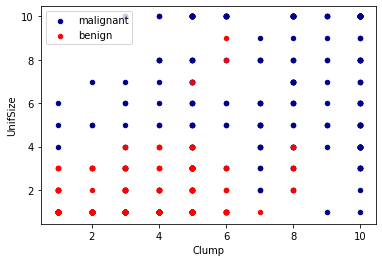

In [21]:
ax=df[df['Class']==4].plot(kind='scatter',x='Clump',y='UnifSize',color='darkblue',label='malignant')
df[df['Class']==2].plot(kind='scatter',x='Clump',y='UnifSize',color='Red',label='benign',ax=ax)
plt.show()#plotting scatter plot for benign and malignant

In [22]:
df.dtypes#datatypes of columns

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [23]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [33]:
#feature set
x=np.asarray(df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']])
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [29]:
#target set or response values
y=np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [39]:
#splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(546, 9) (546,)
(137, 9) (137,)


In [40]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
#predicting y_test and comparing actual and predicted values
yhat=clf.predict(x_test)
print(yhat[0:10])
print(y_train[0:10])

[2 4 2 4 2 2 2 2 4 2]
[4 2 2 4 4 2 2 2 4 4]


In [57]:
print(clf.predict([[4,3,3,0,4,1,6,2,2]]))#predicting unknown values

[2]


In [48]:
#Evaluation
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average='weighted')

0.9639038982104676

In [52]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(yhat,y_test)

0.9635036496350365